# Memology

In [41]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pylab import rcParams      
rcParams['figure.figsize'] = 6, 6
%matplotlib inline

In [21]:
memes = pd.DataFrame()

In [22]:
for i in range(10):
    memes = memes.append(pd.read_csv('/Users/dmitrys/Desktop/DataProjects/KnowYourMemes/Memes_{}.csv'.format(i+1)), ignore_index=True)

In [23]:
memes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [30]:
memes = memes.drop_duplicates("name")

In [39]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11679 entries, 0 to 13445
Data columns (total 10 columns):
name        11679 non-null object
added       11679 non-null object
views       11679 non-null int64
comments    11679 non-null object
status      11679 non-null object
year        11679 non-null object
tags        11679 non-null object
about       6832 non-null object
origin      4819 non-null object
spread      947 non-null object
dtypes: int64(1), object(9)
memory usage: 1003.7+ KB


In [31]:
memes.head(3)

,name,added,views,comments,status,year,tags,about,origin,spread
0,Last Time The Cubs Won the World Series,"Nov 03, 2016 at 11:22AM EDT",17157,60,Submission,Sports,Chicago,Last Time the Cubs Won the World Series refers...,NaN,Jokes and fascination with the Cubs’ had small...
1,PenorCut's Fiverr Videos,"Jul 20, 2015 at 07:54PM EDT",36629,39,Submission,Researching,YouTube,NaN,NaN,NaN
2,AmourShipping,"Nov 02, 2016 at 03:01PM EDT",32293,81,Submission,Pairing,Unknown,Amourshipping refers to the romantic pairing o...,"On September 12th, 2013, a discussion thread f...",NaN


In [36]:
memes.tail(3)

,name,added,views,comments,status,year,tags,about,origin,spread
13443,Cannon Penis,"Oct 11, 2010 at 06:07PM EDT",20202,14,Submission,NSFW,YouTube,NaN,NaN,NaN
13444,Gaben,"Oct 11, 2010 at 01:22PM EDT",479780,49,Submission,2010,"tf2, stop, newell, control, wait, gabe, gaben,...","Gaben is a nickname given to Gabe Newell, the ...",The soundclip of Gabe Newell saying “gaben” ca...,NaN
13445,alex smith fail,"Oct 11, 2010 at 06:00AM EDT",2730,14,Deadpool,2010,"alex smith, 49ers, sf, san francisco, fail.qb,...",NaN,NaN,NaN


In [33]:
memes[memes.views==memes.views.max()]

,name,added,views,comments,status,year,tags,about,origin,spread
6362,Doge,"Jul 24, 2013 at 04:29PM EDT",11551088,893,Confirmed,Character,Tumblr,Doge is a slang term for “dog” that is primari...,The use of the misspelled word “doge” to refer...,"On October 28th, 2010, a photo of Kabosu was s..."


In [42]:
memes['Timestamp'] = memes.added.apply(lambda x: pd.to_datetime(x))

In [43]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

In [44]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

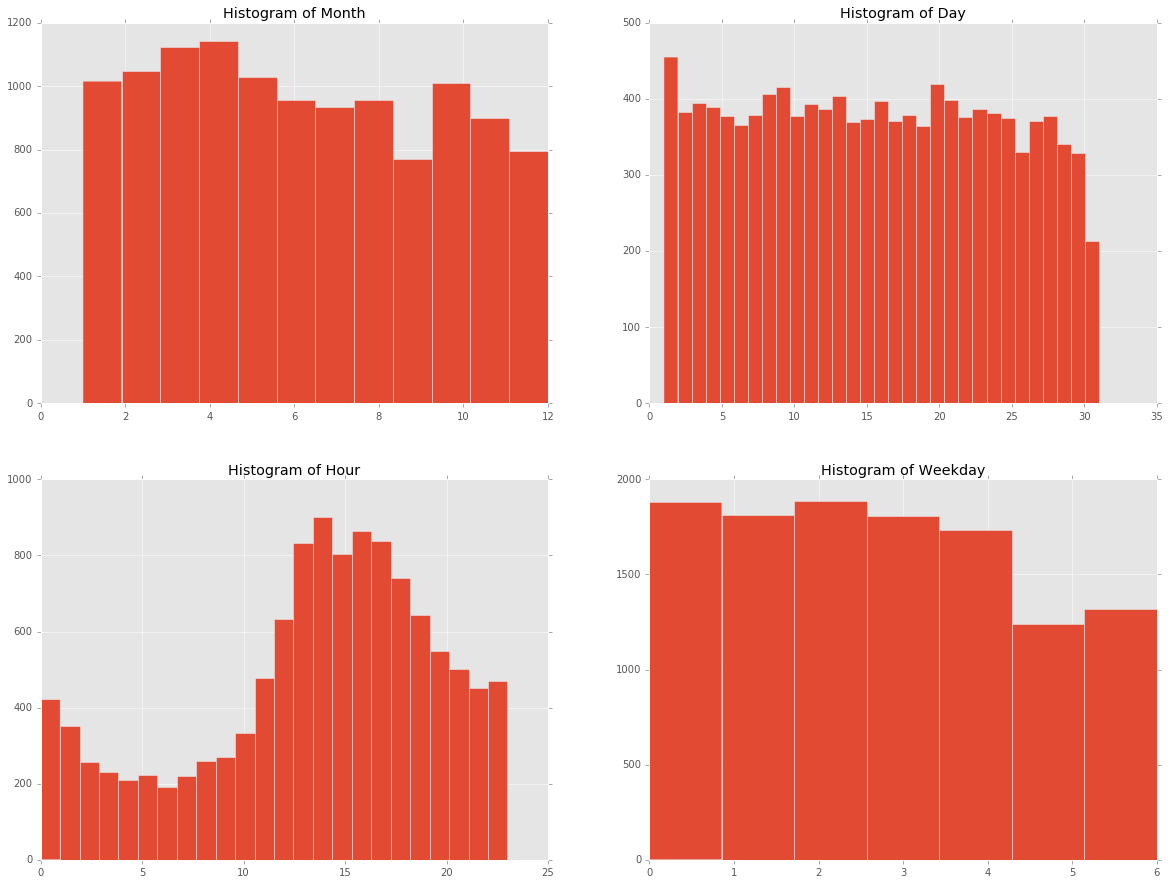

In [45]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(20,15))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

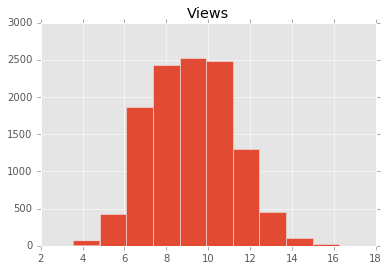

In [47]:
memes.views[memes.views>0].apply(np.log).hist(bins=10)
plt.title("Views")
plt.show()

In [48]:
memes['average_views'] = memes.views/memes.days_from_creation

In [53]:
memes[memes.name=="#DrunkHillary"]

,name,added,views,comments,status,year,tags,about,origin,spread,Timestamp,Year,Month,Day,Hour,Weekday,days_from_creation,average_views
7551,#DrunkHillary,"Nov 07, 2016 at 01:17PM EST",2568,29,Submission,Politics,The National Enquirer,#DrunkHillary is a hashtag used by supporters ...,"On August 8th, 2015, John Podesta sent an emai...",NaN,2016-11-07 13:17:00,2016,11,7,13,0,0.0,inf


In [52]:
sorted_df = memes.sort_values(by='average_views', ascending=False)
for i in (sorted_df.index.tolist()[:7]):
    print('\nНазвание: ')
    print(sorted_df.loc[i,'name'])
    print("Среднее число просмотров в день {}".format(round(sorted_df.loc[i,'average_views'])))
    print('==================')


Название: 
#DrunkHillary
Среднее число просмотров в день inf

Название: 
Harambe the Gorilla
Среднее число просмотров в день 14441.0

Название: 
Dat Boi
Среднее число просмотров в день 13750.0

Название: 
Ken Bone
Среднее число просмотров в день 11085.0

Название: 
Doge
Среднее число просмотров в день 9611.0

Название: 
Describe Yourself in 3 Fictional Characters
Среднее число просмотров в день 7528.0

Название: 
Hugh Mungus
Среднее число просмотров в день 6872.0
